## Python sandbox for checking nestedness properties

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [3]:
class Market:
    def __init__(self, t, f):
        self.m = len(t)
        assert len(f) == self.m
        
        self.sort_order = np.argsort(t)
        self.t = np.array(t)[self.sort_order]
        self.f = np.array(f)[self.sort_order]
        self.tf = self.t * self.f 
        
    def __str__(self):
        s = ""
        s += "t  = " + str(self.t) + "\n"
        s += "f  = " + str(self.f) + "\n"
        s += "tf = " + str(self.tf) + "\n"
        return s

    def __repr__(self):
        return str(self)
        
    def valuation(self, X):
        """
        Return the valuation of the portfolio `X`, a list of schools, with respect to the market.
        """
        X.sort()

        res = 0.0
        cp = np.cumprod(1 - self.f[X[:0:-1]])[::-1]

        for i, j in enumerate(X[:len(X)-1]):
            res += self.tf[j] * cp[i]

        res += self.tf[X[-1]]

        return res
    
    def valuation_lb(self, X):
        """
        Return a lower bound on the valuation of the portfolio `X`, a list of schools, with respect to the market.
        """
        return np.mean(self.tf[X])
    
    def optimize(self, h):
        """
        Return the optimal application portfolio when the limit is `h`. Solves by enumeration.
        """
        val = 0
        X = []
        
        for X_ in combinations(range(self.m), h):
            X_ = list(X_)
            val_ = self.valuation(X_)
            
            if val_ > val:
                val = val_
                X = X_
        return X

In [4]:
m=4
market = Market(np.random.exponential(size=m),
                np.random.rand(m))

market.valuation([0, 2, 3])
market

t  = [0.12763321 0.3276001  0.9669666  0.97068451]
f  = [0.02651789 0.42621699 0.31249013 0.22148461]
tf = [0.00338456 0.13962873 0.30216752 0.21499168]

In [5]:
market.valuation([0, 2, 3]) - market.valuation_lb([0, 2, 3])

0.27853070020796655

In [6]:
market = Market([18.559752488330187, 24.36472217546022, 28.408724728401776, 34.67814499807042],
                [0.814442884064013, 0.40541831889495705, 0.28208053214120027, 0.18150771871696775])
market.valuation([0, 1])

18.865517170304305

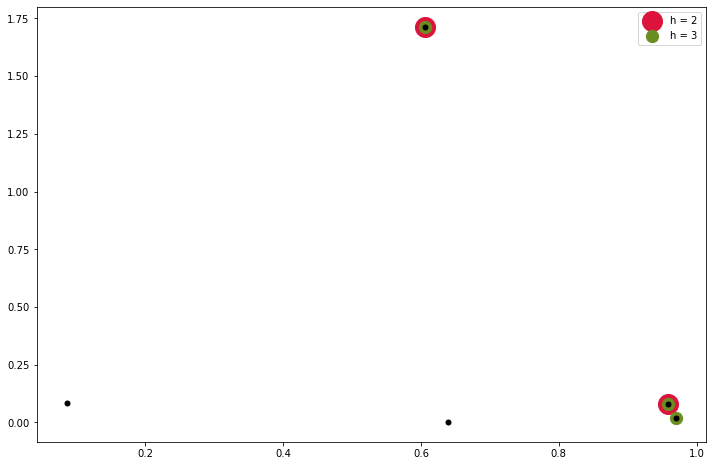

In [8]:
m = 5
market = Market(np.random.exponential(size=m),
                np.random.rand(m))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

X2 = market.optimize(2)
X3 = market.optimize(3)

ax.scatter(market.f[X2], market.t[X2], s=400, c="crimson", label="h = 2")
ax.scatter(market.f[X3], market.t[X3], s=150, c="olivedrab", label="h = 3")
ax.scatter(market.f, market.t, s=25, c="black", label=None)
ax.legend()

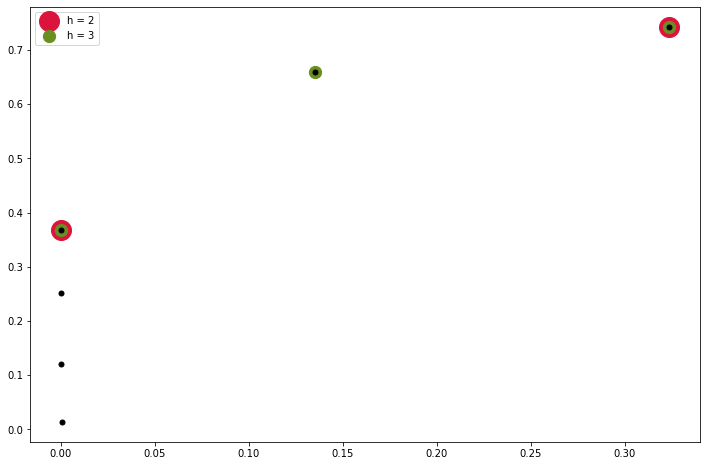

In [50]:
m = 6
market = Market(np.random.exponential(size=m),
                np.random.rand(m))


cp = np.ones(m)

for i in range(m):
    cp[i] *= market.f[i] 
    cp[i] *= (1 - market.f[i])**(m-i-1)


fig, ax = plt.subplots(1, 1, figsize=(12, 8))

X2 = market.optimize(2)
X3 = market.optimize(3)

ax.scatter((market.t * cp)[X2], market.t[X2], s=400, c="crimson", label="h = 2")
ax.scatter((market.t * cp)[X3], market.t[X3], s=150, c="olivedrab", label="h = 3")
ax.scatter(market.t * cp, market.t, s=25, c="black", label=None)
ax.legend()

In [180]:
for t in range(5000):
    if t % 500 == 0:
        print(t)
    
    m = 10
    market = Market(np.random.exponential(size=m),
                    np.random.rand(m))

    X2 = market.optimize(2)
    X3 = market.optimize(3)
    X4 = market.optimize(4)

    assert np.all([i in X3 for i in X2])
    assert np.all([i in X4 for i in X3])

0
500
1000
1500
2000
2500
3000
3500
4000
4500


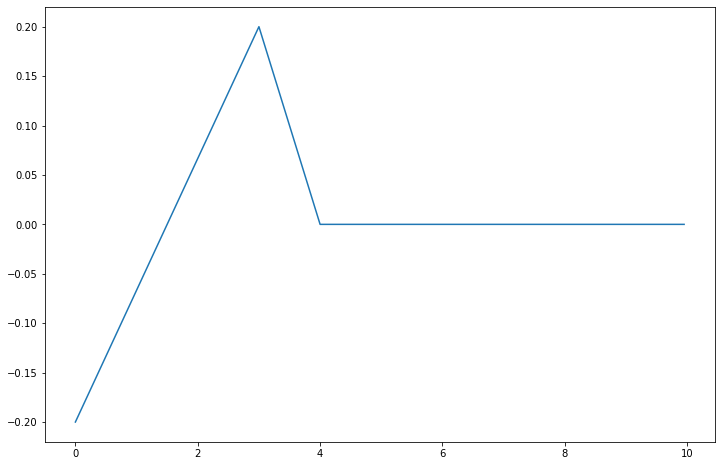

In [183]:
t_j, f_j = 3, 1/3
t_k, f_k = 4, 1/5

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

def fd(t_l):
    return (1 - f_k) * t_l + f_k * max(t_k, t_l) - (1 - f_j) * t_l - f_j * max(t_j, t_l)

t_l = np.arange(0, 10, 0.05)
ax.plot(t_l, [fd(t) for t in t_l])

In [190]:
market = Market([3, 3, 4], [1, 1/3, 1/5])
market

t  = [3 3 4]
f  = [1.         0.33333333 0.2       ]
tf = [3.  1.  0.8]